In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
rng = np.random.default_rng()

In [3]:
#Let me write down all the functions first 
def f_26(x):
    return (x**2 + x)/np.sqrt(x) * np.exp(-x)

def f_27_a(x):
    return np.exp(np.sin(2*x))

def f_27_b(x):
    return 1 / (2 + np.cos(x))

def f_27_c(x):
    return np.exp(-x**2 /2)

def f_28(x):
    return np.sqrt(x)*np.cos(x)

Monte Carlo Integration:  2.216456096594415
Scipy Integration:  2.2137555660034107


(array([1.8235e+04, 1.6731e+04, 1.5186e+04, 1.3686e+04, 1.2328e+04,
        1.1237e+04, 1.0310e+04, 9.5840e+03, 8.5870e+03, 7.6750e+03,
        6.9520e+03, 6.4140e+03, 5.7130e+03, 5.2680e+03, 4.8580e+03,
        4.2950e+03, 3.8420e+03, 3.6760e+03, 3.1760e+03, 2.9750e+03,
        2.7160e+03, 2.4320e+03, 2.1850e+03, 2.0210e+03, 1.8370e+03,
        1.6730e+03, 1.4990e+03, 1.3100e+03, 1.2410e+03, 1.1240e+03,
        1.0150e+03, 9.0200e+02, 8.2300e+02, 7.9500e+02, 7.4900e+02,
        6.4300e+02, 5.9000e+02, 5.1500e+02, 4.7500e+02, 4.3500e+02,
        3.7600e+02, 3.7000e+02, 3.2200e+02, 2.8100e+02, 2.7600e+02,
        2.4800e+02, 2.3600e+02, 2.1100e+02, 1.9800e+02, 1.7800e+02,
        1.4600e+02, 1.5000e+02, 1.3600e+02, 8.1000e+01, 9.3000e+01,
        1.0600e+02, 6.8000e+01, 7.9000e+01, 7.9000e+01, 6.3000e+01,
        4.9000e+01, 5.3000e+01, 4.2000e+01, 4.8000e+01, 3.8000e+01,
        3.1000e+01, 2.6000e+01, 2.5000e+01, 2.1000e+01, 3.2000e+01,
        2.0000e+01, 2.1000e+01, 2.9000e+01, 1.20

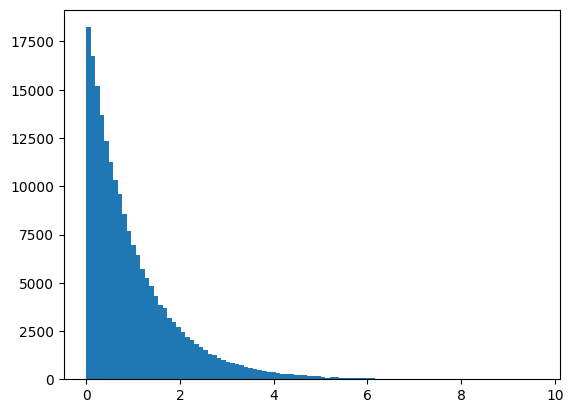

In [4]:
#7.26
#Monte Carlo Integration as provided in class 

x_samp = np.linspace(0, 10, 2**7)

def p(x):
    return np.exp(-x)

def cumdist(f,x):
    return np.cumsum(f(x)) / np.sum(f(x))

from scipy import interpolate
inverse_cumdist = interpolate.interp1d(cumdist(p,x_samp), x_samp)

N = 200_000
xs = rng.uniform(min(cumdist(p,x_samp)), max(cumdist(p,x_samp)), size = N )

def z(x):
    return (x**2 + x) / np.sqrt(x)

print("Monte Carlo Integration: ", np.mean(z(inverse_cumdist(xs))))

def F(x):
    return (x**2 + x) / np.sqrt(x) * np.exp(-x)

quad_out, err = integrate.quad(F, min(x_samp), max(x_samp))
print("Scipy Integration: ", quad_out)

#Visualization 
fig, axs = plt.subplots()
plt.hist(inverse_cumdist(xs), bins = 100)

7.27 (a):  Monte Carlo Integration:  7.945276316487802 Scipy Integration:  (7.954926521012845, 4.052187353026371e-10)
7.27 (b):  Monte Carlo Integration:  3.603940844418603 Scipy Integration:  (3.6275987284684352, 7.282921932194597e-09)
7.27 (c):  Monte Carlo Integration:  1.6989 Scipy Integration:  (1.7112487837842973, 1.8998678006191232e-14)


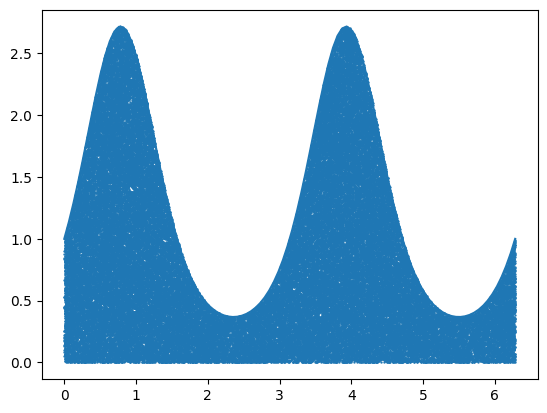

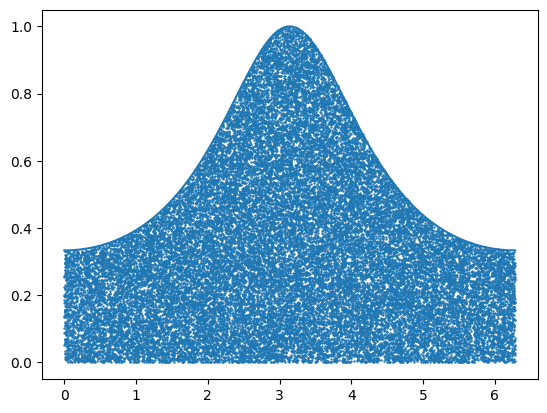

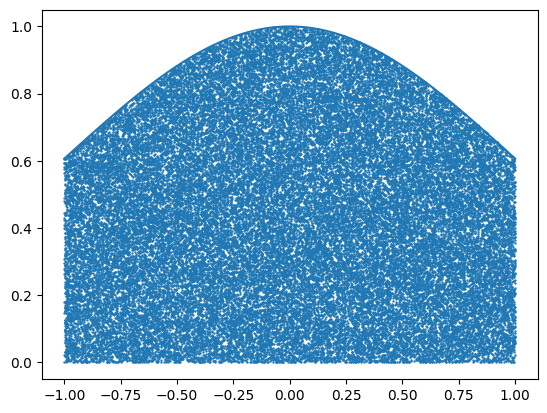

In [5]:
# 7.27
# Monte Carlo Integration function

#Visualization
x_27_a = np.linspace(0, 2*np.pi, 100)
x_27_c = np.linspace(-1, 1, 100)

x_rand_points = rng.uniform(0, 2*np.pi, 200_000)
x_rand_points_c = rng.uniform(-1, 1, 200_000)
y_rand_points = rng.uniform(0, 3, 200_000)

is_inside_a = y_rand_points < f_27_a(x_rand_points)
is_inside_b = y_rand_points < f_27_b(x_rand_points)
is_inside_c = y_rand_points < f_27_c(x_rand_points_c)

box_area = (2*np.pi - 0)*(3 - 0)
box_area_c = (1 - (-1))*(3 - 0)

integral_a = box_area*np.sum(is_inside_a) / N 
integral_b = box_area*np.sum(is_inside_b) / N
integral_c = box_area_c*np.sum(is_inside_c) / N

print("7.27 (a): ", "Monte Carlo Integration: ", integral_a, "Scipy Integration: ", integrate.quad(f_27_a, 0, 2*np.pi ))
print("7.27 (b): ", "Monte Carlo Integration: ", integral_b, "Scipy Integration: ", integrate.quad(f_27_b, 0, 2*np.pi))
print("7.27 (c): ", "Monte Carlo Integration: ", integral_c, "Scipy Integration: ", integrate.quad(f_27_c, -1, 1))


plt.scatter(x_rand_points[is_inside_a], y_rand_points[is_inside_a], s=0.5)
plt.plot(x_27_a, f_27_a(x_27_a))
plt.show()

plt.scatter(x_rand_points[is_inside_b], y_rand_points[is_inside_b], s=0.5)
plt.plot(x_27_a, f_27_b(x_27_a))
plt.show()

plt.scatter(x_rand_points_c[is_inside_c], y_rand_points[is_inside_c], s=0.5)
plt.plot(x_27_c, f_27_c(x_27_c))
plt.show()

Scipy Integration:  (-0.8948314694841447, 5.742084585591556e-11)
Monte Carlo Integration:  -0.9044959408950374


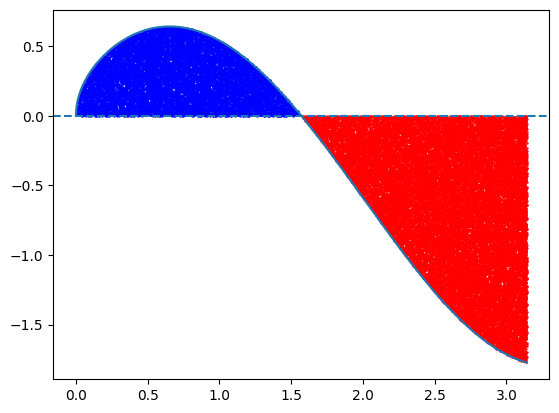

In [6]:
x = np.linspace(0, np.pi, 1000)

plt.plot(x, f_28(x))

Nsamp = 200_000
x_i = rng.uniform(0, np.pi, Nsamp)
y_i = rng.uniform(-2, 1, Nsamp) 

is_inside = y_i < f_28(x_i)
is_pos = y_i > 0
is_neg = y_i < 0

plt.scatter(x_i[is_inside*is_pos], y_i[is_inside*is_pos], c="blue", s=0.5)
plt.scatter(x_i[~is_inside*is_neg], y_i[~is_inside*is_neg], c="red", s=0.5)

plt.axhline(0, linestyle="--")

total_area = (np.pi - 0) * (1 - (-2))
print("Scipy Integration: ", integrate.quad(f_28, 0, np.pi))

# number of positive and negative samples that are under their respective parts
N_pos = np.sum(is_inside & is_pos)
N_neg = np.sum((~is_inside) & is_neg)

integral = total_area * (N_pos - N_neg) / Nsamp
print("Monte Carlo Integration: ", integral)